In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from gensim import corpora
import gensim
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Download files, set up folder, put files into folder

In [2]:
# training data: ../data/train.csv
# test data:     ../data/test.csv

# Load training data

In [4]:
filepath = 'C:/data/funnyHeadlines/train.csv'
dataframe = pd.read_csv(filepath)
print('training data size:', len(dataframe))
# print(dataframe)

training data size: 7239


# Count words

In [5]:
# take out all title texts in a list
titles = []
for index, row in dataframe.iterrows():
    title_text = row['original'].replace('<', '').replace('/>', '')
    titles.append( title_text )

In [6]:
# keep a counter of word frequency
counter = Counter()
for title in titles:
    counter.update(title.strip().lower().split())

# sort words by frequency from high to low
for word, count in sorted(counter.items(), key = lambda x: x[1], reverse = True)[:100]:
    print (word, count)

trump 2798
to 2359
' 2114
, 1769
the 1641
in 1398
: 1392
of 1243
's 1158
for 924
on 910
a 862
is 749
and 686
’s 594
with 553
says 477
. 435
house 413
’ 400
‘ 367
as 328
at 326
from 309
donald 305
us 303
it 301
after 299
russia 289
white 287
new 287
u.s. 257
over 252
that 241
be 231
his 230
will 227
? 226
he 225
not 225
korea 223
president 217
gop 216
" 208
by 206
bill 206
north 206
about 202
n't 193
are 189
was 183
tax 179
what 169
russian 165
more 160
has 160
democrats 158
senate 157
news 148
who 147
china 146
how 146
could 145
mueller 142
i 141
say 140
republicans 139
report 139
against 139
state 138
up 135
have 135
we 129
plan 127
out 124
into 124
may 123
- 123
back 122
obama 121
no 120
but 118
— 117
an 115
election 114
health 114
obamacare 113
clinton 111
do 111
you 109
syria 108
if 108
just 106
first 105
get 105
government 105
ban 105
deal 104
$ 102
fbi 99


# News title length distribution

In [7]:
# keep a list of title lengths (title length = # of tokens in title)
length_array = []
for title in titles:
    length_array.append( len(title.strip().lower().split()) )
print ('document length average:', np.mean(length_array))
print ('document length standard deviation:', np.std(length_array))

document length average: 12.2403646913
document length standard deviation: 3.67625049674


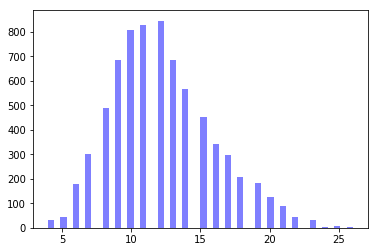

In [8]:
num_bins = 50
n, bins, patches = plt.hist(length_array, num_bins, facecolor='blue', alpha=0.5)
plt.show()

# Topic modeling

In [8]:
# adapted from: https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

In [9]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manzh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# process a text string into a list of tokens

def prepare_text_for_lda(text):
    # convert all words into lower case, split by white space
    tokens = text.strip().lower().split()
    
    #  remove words with 1 or 2 letters (small words, punctuation)
    tokens = [token for token in tokens if len(token) > 2]
    
    # remove English stopwords (as defined by NLTK)
    tokens = [token for token in tokens if token not in en_stop]
    return tokens

In [11]:
# convert the corpus into a sparse matrix format for gensim

text_data = []
for title in titles:
    title = prepare_text_for_lda(title)
    text_data.append(title)
            
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [12]:
# train latent Dirichlet topic model

NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.039*"trump" + 0.015*"comey" + 0.014*"house" + 0.012*"fbi" + 0.011*"white"')
(1, '0.030*"trump" + 0.026*"korea" + 0.024*"north" + 0.015*"says" + 0.011*"missile"')
(2, '0.017*"house" + 0.012*"trump" + 0.009*"white" + 0.007*"gop" + 0.006*"take"')
(3, '0.022*"trump" + 0.009*"new" + 0.007*"time" + 0.006*"police" + 0.006*"say"')
(4, '0.070*"trump" + 0.010*"says" + 0.010*"clinton" + 0.009*"president" + 0.009*"north"')
(5, '0.070*"trump" + 0.011*"donald" + 0.011*"house" + 0.008*"moore" + 0.007*"white"')
(6, '0.051*"trump" + 0.015*"health" + 0.014*"syria" + 0.014*"u.s." + 0.010*"says"')
(7, '0.042*"trump" + 0.021*"house" + 0.017*"white" + 0.010*"people" + 0.009*"new"')
(8, '0.043*"trump" + 0.012*"donald" + 0.009*"security" + 0.008*"says" + 0.007*"national"')
(9, '0.038*"trump" + 0.014*"russia" + 0.009*"ban" + 0.007*"mueller" + 0.007*"travel"')


In [13]:
# predict topic distribution of a new title
new_doc = 'North Korea Health Bill'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
predicted_topics = ldamodel.get_document_topics(new_doc_bow)
print('topic distribution:\n', predicted_topics)
# print('topic distribution shoulld sum up to 1:', sum([v for k, v in predicted_topics]))

topic distribution:
 [(0, 0.020001709), (1, 0.49798885), (2, 0.020001905), (3, 0.020002229), (4, 0.020003356), (5, 0.020001369), (6, 0.3419964), (7, 0.020001665), (8, 0.020000357), (9, 0.020002114)]


# meanGrade Distribution 

In [14]:
meanGrade = dataframe['meanGrade'].tolist()

In [15]:
print ('meanGrade average:', np.mean(meanGrade))
print ('meanGrade standard deviation:', np.std(meanGrade))

meanGrade average: 0.9380485334070082
meanGrade standard deviation: 0.5862861999031851


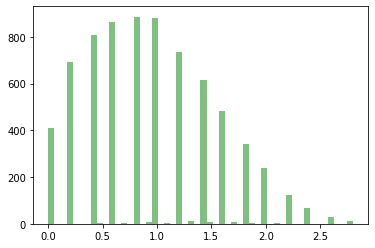

In [16]:
num_bins = 50
n, bins, patches = plt.hist(meanGrade, num_bins, facecolor='green', alpha=0.5)
plt.show()